<a href="https://colab.research.google.com/github/spacemaninSeoul/PythonMachinelearningGuide/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C%5D_V_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀 소개

**회귀 분석**은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.

통계햑 용어를 빌리자면 **회귀**는 여러 개의 독립 변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다. 예를 들어 아파트의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지를 모델링하고 예측하는 것이다.

Y = W1 * X1 + W2 * X2 + W3 * X3 + ... + Wn * Xn 이라는 선형 회귀식을 예로 들면 Y는 종속변수, 즉 아파트 가격을 뜻한다. 그리고 X1, X2, X3, ... , Xn은 방 개수, 방 크기, 주변 학군 등의 독립변수를 의미한다. 그리고 W1, W2, W3, ... Wn은 독립변수의 값에 영향을 미치는 **회귀 계수(Regression coefficients)**이다. 머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정 값이다. 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것이다.

회귀에서 가장 중요한 것은 회귀 계수인데, 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.
* 독립변수 개수 - 1개: 단일 회귀, 여러 개: 다중 회귀
* 회귀 계수의 결합 - 선형: 선형 회귀, 비선형: 비선형 회귀

지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀이다. 이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값이라는 것이다.

여러 가지 회귀 중 선형 회귀가 가장 많이 사용된다. **선형 회귀**는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있다.

**규제**는 일반적인 성형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다. 대표적인 선형 회귀 모델은 다음과 같다.
* **일반 선형 회귀**: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델이다.
* **릿지(Ridge)**: 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. **L2 규제**는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.
* **라쏘(Lasso)**: 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, **L1** 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불립니다.
* **엘라스틱넷(ElasticNet)**: L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.
* **로지스틱 회귀(Logistic Regression)**: 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. 단순 선형 회귀를 통한 회귀 이해

**단순 선형 회귀**는 독립 변수도 하나, 종속 변수도 하나인 선형 회귀이다.

예측값 ^Y는 w0 + w1 * X로 계산할 수 있다. 독립변수가 1개인 단순 선형 회귀에서는  이 기울기 w1과 절편 w0을 회귀 계수로 지칭한다(절편은 영어로 intercept)

실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다. 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미이다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.

오류 값은 +나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하지 않게 오류 합이 크게 줄어들 수 있다. 따라서 보통 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취한다. 일단적으로 미분 등의 계싼을 편리하게 하기 위해서 RSS(Residual Sum of Square) 방식으로 오류 합을 구한다. 즉, Error^2 = RSS

RSS는 이제 변수가 w0, w1인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주한다).



> RSS(w0, w1) = 1/N * 시그마i=1에서 n까지 (yi - (w0 + w1 * xi))^2

회귀에서 RSS는 이 비용(Cost)이며 w 변수(회구 계수)로 구성되는 RSS를 비용 함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 함수를 손실 함수(loo function)라고도 한다.



# 3. 비용 최소화하기 - 경사 하강법(Gradient Descent)

**경사 하강법**의 사전적 의미인 '점진적인 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식이다.

경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나갑니다.

핵심은 "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?"이다.

경사 하강법의 일반적인 프로세스는 다음과 같다.
* Step 1 : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.
* Step 2 : w1을 w1 + 학습률 * 2/N * 시그마 xi * (실제값i - 예측값i), w0을 w0 + 학습률 * 2/N 시그마 (실제값i - 예측값i)으로 업데이트한 후 다시 비용 함수의 값을 계산한다.
* Step 3 : 비용 함수의 값이 감소했으면 다시 Step 2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1, w0를 구하고 반복을 중지한다.

경사 하강법을 파이썬 코드로 구현해보도록 한다.

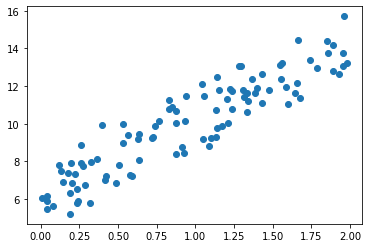

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
#print(X)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

데이터는 y = 4X + 6을 중심으로 무작위로 퍼져 있다. 다음으로 비용 함수를 정의한다. 비용 함수 get_cost( )는 실제 y 값과 예측된 y 값을 인자로 받아서 1/N * ㅅ;그마 (실제값i - 예측값i)^2 을 계산해 반환한다.

In [6]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

이제 경사 하강법을 gradient_descent( ) 라는 함수를 생성해 구현해 본다. gradient_descent( )는 w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트한다. 즉, 새로운 w1 = 이전 w1 + 학습률 * 2/N * 시그마 xi * (실제값i - 예측값i), 새로운 w0 = 이전 w0 + 학습률 * 2/N * 시그마 (실제값i - 예측값i) 을 반복적으로 적용하면서 w1과 w0을 업데이트하는 것이다.

get_weight_update( ) 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 구한다. 100개의 데이터 X(1, 2, ..., 100)이 있다면 예측값은 w0 + X(1) * w1 + X(2) * w1 + ... + X(100) * w1이며, 이는 입력 배열 X와 w1 배열의 내적과 동일하다. 따라서 넘파이의 내적 연산인 dot( )를 이용해 y_pred = np.dot(X, w1.T) + w0로 예측 배열값을 계산한다. 또한 get_weight_update( )는 w1_update로 -학습률 * 2/N * 시그마 xi *(예측 오류i)를, w0_update로 -학습률 * 2/N 시그마 (예측 오류i) 값을 넘파이 dot 행렬 연산으로 계산한 뒤 이를 반환한다.

In [10]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  # w0_updata를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N) * learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

다음은 get_weight_updates( )을 경사 하강 방식으로 반복적으로 수행하여 w1과  w0를 업데이트하는 함수인 gradient_descent_steps( ) 함수를 생성한다.

In [11]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0과 w1을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

이제 gradient_descent_steps( )를 호출해 w1과 w0을 구하도록 한다. 그리고 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost( ) 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산해 보도록 한다.

In [13]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


앞에서 구한 y_pred에 기반해 회귀선을 그려보도록 한다.

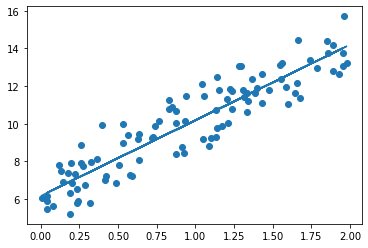

In [14]:
plt.scatter(X, y)
plt.plot(X, y_pred)

경사 하강법을 이용해 회귀선이 잘 만들어졌음을 알 수 있다. 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다. 그 때문에 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)를 이용한다. **확률적 경사 하강법**은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다. (미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps( ) 함수로 구현해보도록 한다. 이는 앞에서 생성한 gradient_descent_steps( ) 함수와 크게 다르지 않다. 다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.

In [16]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [17]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0, 0], 3), 'w0:', round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 경사 하강법으로 구한 예측 오류 비용보다 아주 조금 높을 뿐 큰 예측 성능상 차이가 없음을 알 수 있다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용한다.

피처가 여러 개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있다.

피처가 한 개인 경우의 예측값 Y^ = w0 + w1 * X로 회귀 계수를 도출한다. 피처가 M개(X1, X2, ... X100) 있다면 그에 따른 회귀 계수도 M + 1(1개는 w0)개로 도출된다.

즉, Y^ = w0 + w1 * X1 + w2 * X2 + ... + w100 * X100과 같이 예측 회귀식을 만들 수 있다. 이렇게 회귀 계수가 많아지더라도 선형대수를 이용해 간단히 예측값을 도출할 수 있다. 앞의 예제에서 입력 행렬 X에 대해서 예측 행렬 y_pred는 굳이 개별적으로 X의 개별 원소와 w1의 값을 곱하지 않고 np.dot(X, w1.T) + w0을 이용해 계산했다. 마찬가지로 데이터의 개수가 N이고 피처 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w2, ..., w100을 W 배열로 표기하면 예측 행렬 Y^ = np.dot(Xmat, WT) + w0으로 구할 수 있다.

w0를 Weight의 배열인 W안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat 0을 추가할 수 있다. 이렇게 하면 회귀 예측값은 Y^ = Xmat * WT와 같이 도출할 수 있다.

# 4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공한다.

## 1) LinearRegression 클래스 - Ordinary Least Squares

LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스이다. LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Coefficients)인 W를 coef_ 속성에 저장한다.

In [18]:
# class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

SyntaxError: ignored



*   입력 파라미터
  * **fit_intercept**: 불린 값으로, 디폴트는 True. intercept(절편) 값을 계싼할 것인지 말지를 지정. False로 지정하면 intercept가 사용되지 않고 0으로 지정됨.
  * **normalize**: 불린 값으로 디폴트는 False. fit_intercept가 False인 경우에는 이 파라미터가 무시된다. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화한다.
* 속성
  * **coef_**: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수).
  * **intercept_**: intercept(절편) 값


Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이런 현상을 **다중 공선성(multi-collinearity)** 문제라고 한다.



## 2) 회귀 평가 지표

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심이다.

일반적으로 회귀의 성능을 평가하는 지표는 다음과 같다.
* **MAE**: Mean Absolute Error이며 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것이다. MAE = 1/n * 시그마 |Yi - Y^i|
* **MSE**: Mean Squared Error(MSE)이며 실제 값과 예측값의 차이를 제곱해 평균한 것이다. MSE = 1/n * 시그마 (Yi - Y^i)^2
* **RMSE**: MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE(Root Mean Squared Error)이다
* **R^2**: 분산 기반으로 예측 성능을 평가한다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다.

다만 사이킷런은 아쉽게도 RMSE을 제공하지 않는데, 이를 구하기 위해선 MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 한다. 다음은 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값이다.
* **MAE**
  * 사이킷런 평가 지표 API : metrics.mean_absolute_error
  * Scoring 함수 적용 값: 'neg_mean_absolute_error'
* **MSE**
  * 사이킷런 평가 지표 API : metrics.mean_squared_error
  * Scoring 함수 적용 값: 'neg_mean_squared_error'
* **R^2**
  * 사이킷런 평가 지표 API : metrics.mean_squared_error
  * Scoring 함수 적용 값: 'r2'

Scoring 함수에 'neg_~'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문이다. 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요하다.


## 3) LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터를 이용해 선형 회귀 모델을 만들도록 한다.

사이킷런은 보스턴 주택 가격 데이터를 load_boston( )을 통해 제공한다. 이를 로드하고 DataFrame으로 변경한다.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF =  pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격. 이를 PRICE 칼럼으로 DataFrame에 추가.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


다음으로 각 칼럼이 회귀 결과에 어느 정도로 영향을 미치는지 시각화해서 알아보도록 한다.

'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'의 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인한다. 시본(Seaborn)의 **regplot( )** API는 X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려준다.

**matplotlib.subplots( )**를 이용해 각 ax마다 칼럼과 PRICE의 관계를 표현한다. matplotlib의 subplot( )은 여러 개의 그래프를 한번에 표현하기 위해 자주 사용된다. 인자로 입력되는 ncols은 열 방향으로 위치할 그래프의 개수이며, nrows는 행 방향으로 위치할 그래프의 개수이다.


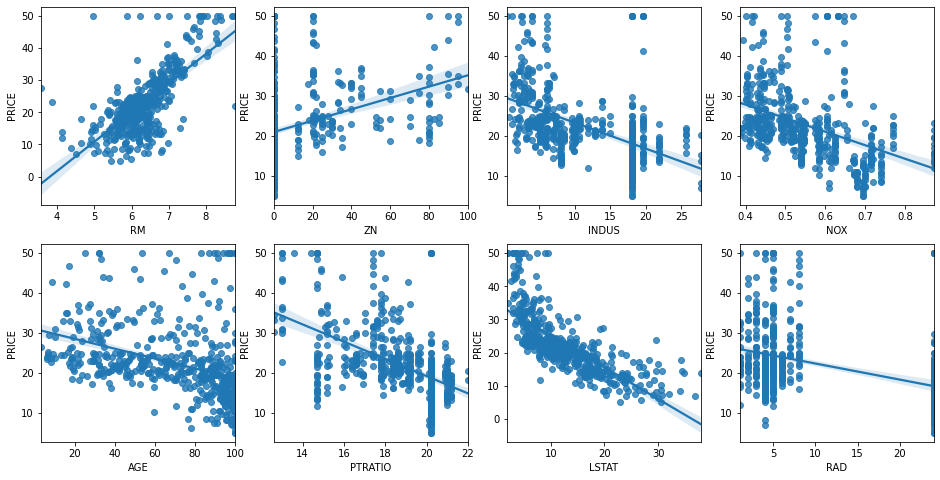

In [21]:
# 2개의 행과 4 개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.

이제 LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들도록 한다. train_test_split( )을 이용해 학습과 테스트 데이터 세트를 분리해 학습과 예측을 수행한다. 그리고 metrics 모듈의 mean_squared_error( )와 r2_score( ) API를 이용해 MSE와 R2 Score를 측정한다.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값을 보도록 한다.

절편은 LinearRegression 객체의 **intercept_**속성에, 회귀 계수는 **coef_** 속성에 값이 저장돼 있다.

In [23]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은순으로 출력해 보도록한다. 이를 위해 판다스 Series의 **sort_values()** 함수를 이용한다.

In [24]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

이번에는 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정한다.

사이킷런은 cross_val_score()를 이용할 텐데, RMSE를 제공하지 않으므로 MSE 수치를 RMSE로 변환해야 한다. cross_val_score()의 인자로 scoring='neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수이다. 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해 scoring='neg_mean_squared_error'로 사이키런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환한다. 따라서 cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE가 된다. 이렇게 다시 변환된 MSE 값에 넘파이의 sqrt( ) 함수를 적용해 RMSE를 구할 수 있다.

In [26]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구한다.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 개별 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 개별 평균 RMSE : 5.829 
